In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import sys,os

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


In [4]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


In [5]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)          0

In [7]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 [==============================] - 8s 64ms/step - loss: 1.1302 - accuracy: 0.6404 - val_loss: 0.2822 - val_accuracy: 0.9246
Epoch 2/16
118/118 [==============================] - 8s 67ms/step - loss: 0.3829 - accuracy: 0.8835 - val_loss: 0.1572 - val_accuracy: 0.9562
Epoch 3/16
118/118 [==============================] - 8s 66ms/step - loss: 0.2731 - accuracy: 0.9176 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 4/16
118/118 [==============================] - 8s 68ms/step - loss: 0.2272 - accuracy: 0.9329 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 5/16
118/118 [==============================] - 8s 68ms/step - loss: 0.1953 - accuracy: 0.9420 - val_loss: 0.0800 - val_accuracy: 0.9753
Epoch 6/16
118/118 [==============================] - 8s 68ms/step - loss: 0.1790 - accuracy: 0.9469 - val_loss: 0.0728 - val_accuracy: 0.9773
Epoch 7/16
118/118 [==============================] - 8s 67ms/step - loss: 0.1576 - accuracy: 0.9521 - val_loss: 0.0649 - val_accuracy: 0.9801

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')


Test loss     : 0.0428
Test accuracy : 0.9856


In [9]:
df=pd.DataFrame(data=history.history)
display(df)

,loss,accuracy,val_loss,val_accuracy
0,1.130170,0.640433,0.282188,0.9246
1,0.382945,0.883500,0.157221,0.9562
2,0.273111,0.917567,0.114867,0.9653
3,0.227155,0.932917,0.093702,0.9726
4,0.195338,0.941950,0.079977,0.9753
5,0.179023,0.946883,0.072784,0.9773
6,0.157635,0.952100,0.064914,0.9801
7,0.149568,0.954033,0.061860,0.9801
8,0.140807,0.957200,0.055911,0.9832
9,0.134115,0.959500,0.054158,0.9831


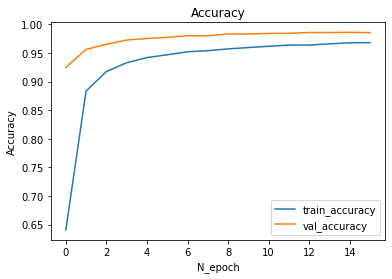

In [10]:
plt.figure()
plt.plot(df['accuracy'],label='train_accuracy')
plt.plot(df['val_accuracy'],label='val_accuracy')
plt.title("Accuracy")
plt.xlabel('N_epoch')
plt.ylabel('Accuracy')
plt.legend()

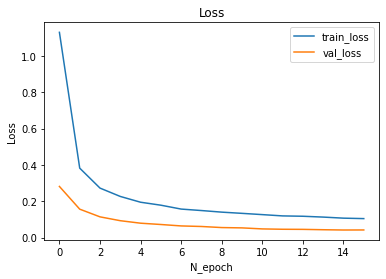

In [11]:
plt.figure()
plt.plot(df['loss'],label='train_loss')
plt.plot(df['val_loss'],label='val_loss')
plt.title("Loss")
plt.xlabel('N_epoch')
plt.ylabel('Loss')
plt.legend()

In [12]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

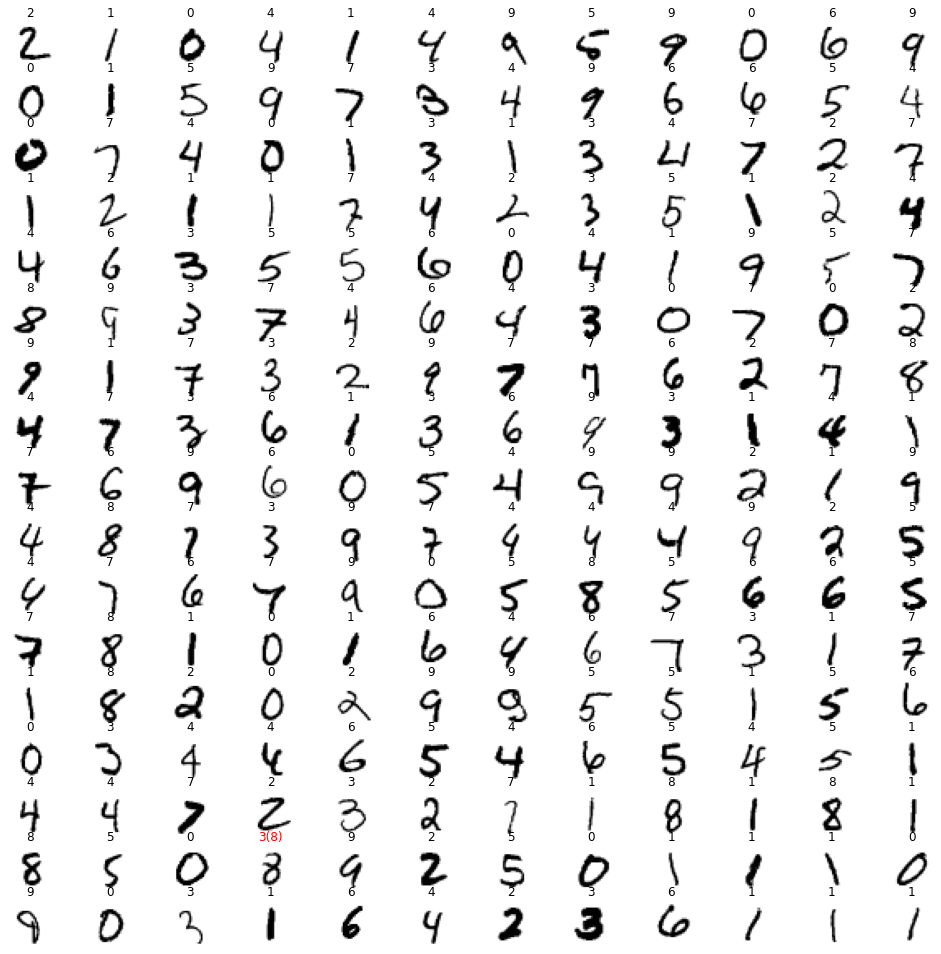

In [13]:
fig=plt.figure(figsize=(17, 17))
columns = 12
rows = 17
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(x_test[i],cmap='binary')
    if y_pred[i]==y_test[i]:
        plt.title(y_test[i])
    else:
        plt.title(f'{y_pred[i]}({y_test[i]})', color='r') 
plt.show()

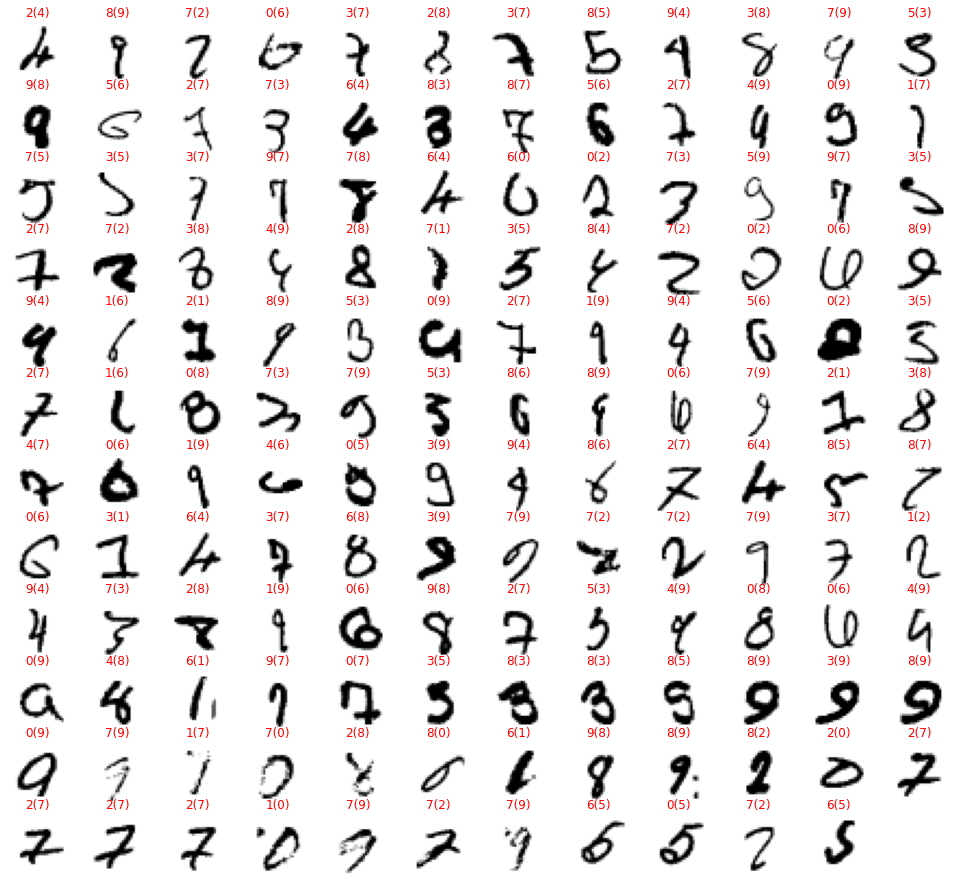

In [14]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
fig=plt.figure(figsize=(17, 17))
columns = 12
rows = int(len(errors)/12)+1
for i in range(1, len(errors)):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(x_test[errors[i]],cmap='binary')
    plt.title(f'{y_pred[errors[i]]}({y_test[errors[i]]})', color='r') 
plt.show()

In [15]:
from sklearn.metrics import  confusion_matrix

In [16]:
confusion_matrix(y_test,y_pred)

array([[ 975,    1,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1129,    2,    1,    0,    0,    2,    1,    0,    0],
       [   3,    1, 1020,    0,    0,    0,    0,    7,    1,    0],
       [   0,    0,    0,  999,    0,    4,    0,    4,    3,    0],
       [   0,    0,    1,    0,  971,    0,    4,    0,    1,    5],
       [   2,    0,    0,    5,    0,  879,    2,    1,    3,    0],
       [   7,    2,    0,    0,    1,    3,  943,    0,    2,    0],
       [   1,    2,   11,    5,    1,    0,    0, 1003,    2,    3],
       [   2,    0,    4,    4,    1,    0,    1,    1,  958,    3],
       [   4,    3,    0,    3,    4,    1,    0,    8,    7,  979]],
      dtype=int64)

<AxesSubplot:>

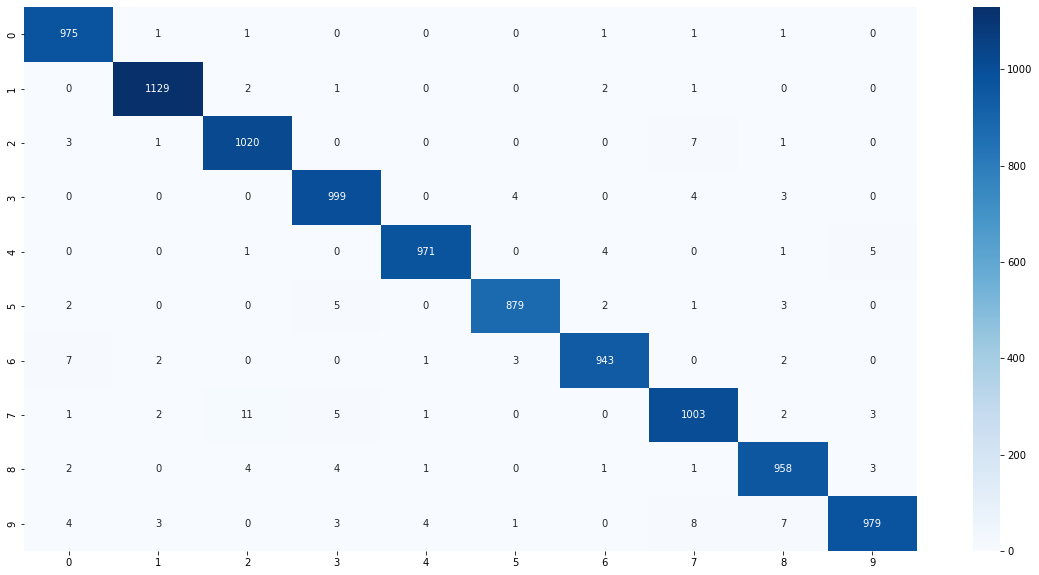

In [17]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='1', cmap='Blues')